In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
sns.set()
import os
import glob
from tqdm import tqdm
import time

In [2]:
plt.rcParams['figure.figsize'] = [25, 15]

In [3]:
tick_data_path = r'..\data\raw\tick_data'

In [4]:
symbol_list = os.listdir(tick_data_path)

# Aggregate bid and ask volume

# Read ask and bid data

In [5]:
ask_df = pd.read_csv('../data/interim/bid_and_ask_volume/ask_df.csv', index_col='trading_date', parse_dates=True)
bid_df = pd.read_csv('../data/interim/bid_and_ask_volume/bid_df.csv', index_col='trading_date', parse_dates=True)
bid_plus_ask = pd.read_csv('../data/interim/bid_and_ask_volume/bid_plus_ask.csv', index_col='trading_date', parse_dates=True)

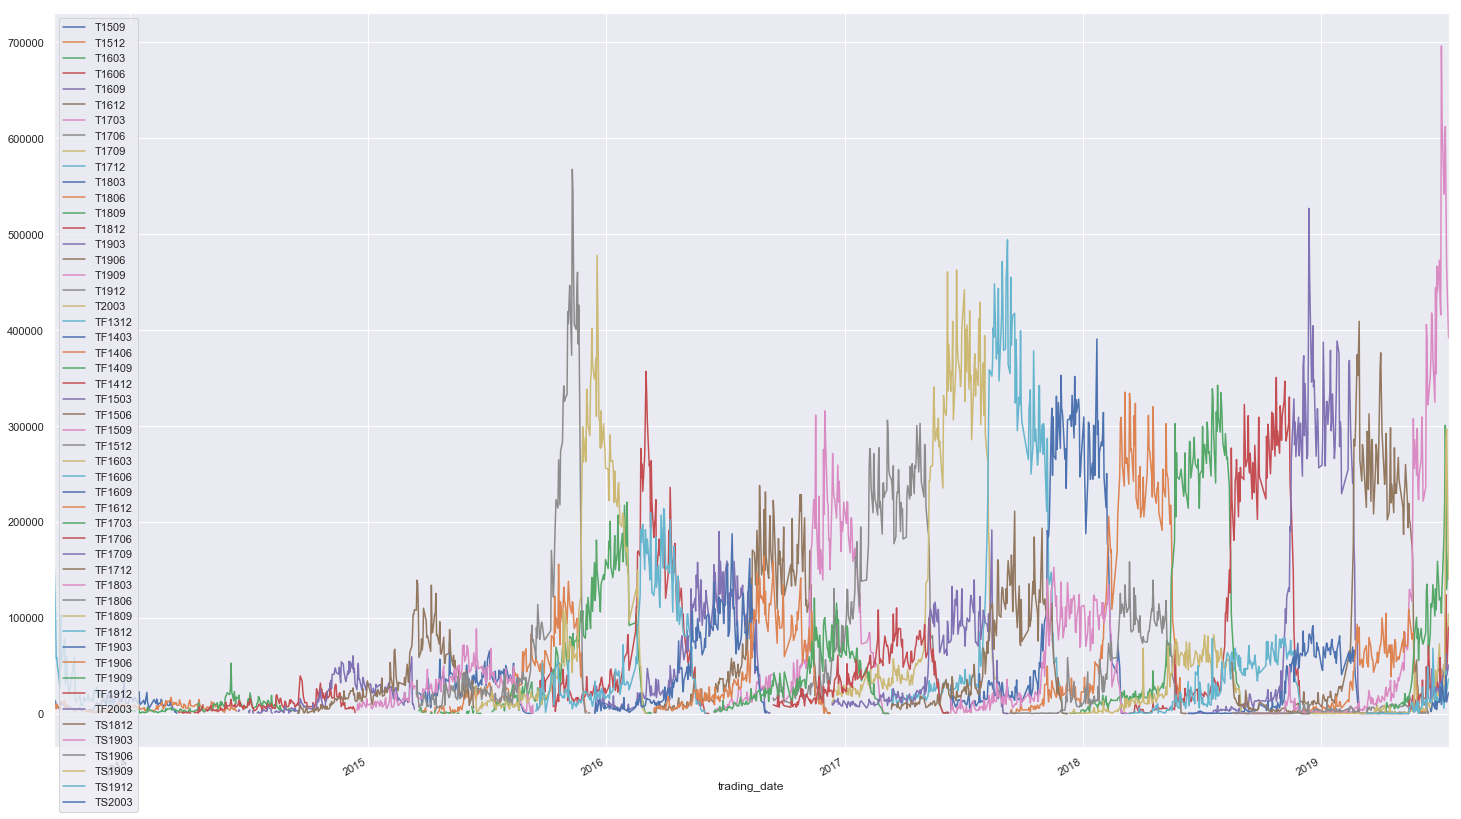

In [6]:
bid_df.plot()

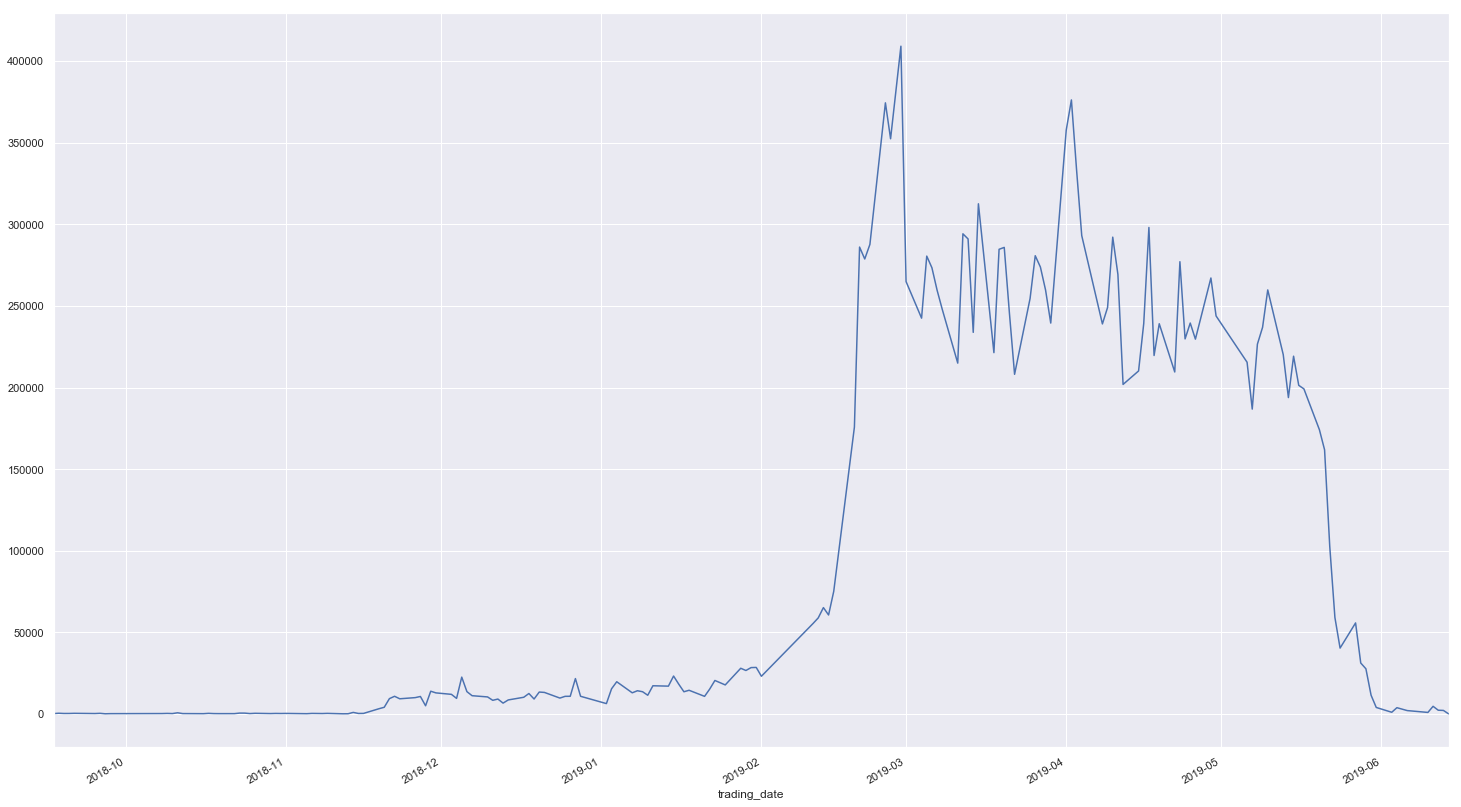

In [7]:
bid_df.T1906.dropna().plot()

In [8]:
TS_bid_plus_ask = bid_plus_ask.loc[:, bid_plus_ask.columns.str.match('TS')].dropna(how='all')
TF_bid_plus_ask = bid_plus_ask.loc[:, bid_plus_ask.columns.str.match('TF')].dropna(how='all')
T_bid_plus_ask = bid_plus_ask.loc[:, ~bid_plus_ask.columns.str.match('TS|TF')].dropna(how='all')

In [9]:
T_bid_plus_ask.to_csv('../data/interim/raw_features/T/T_Posted_Size.csv')
TF_bid_plus_ask.to_csv('../data/interim/raw_features/TF/TF_Posted_Size.csv')
TS_bid_plus_ask.to_csv('../data/interim/raw_features/TS/TS_Posted_Size.csv')

# Calculate posted size fraction

In [10]:
T_posted_size = T_bid_plus_ask.copy()
T_posted_size = T_posted_size.div(T_posted_size.sum(axis=1), axis=0)

In [11]:
TF_posted_size = TF_bid_plus_ask.copy()
TF_posted_size = TF_posted_size.div(TF_posted_size.sum(axis=1), axis=0)

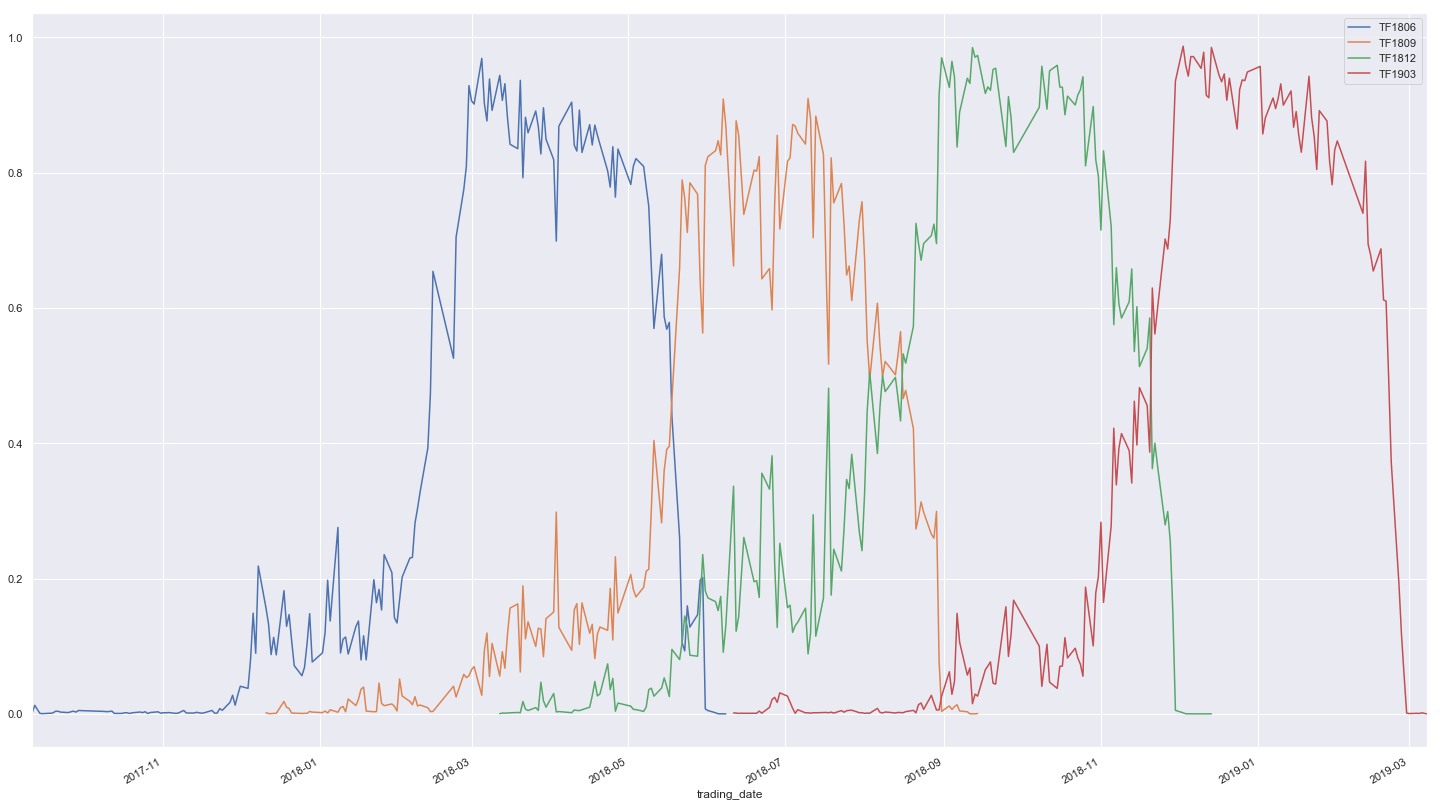

In [12]:
TF_posted_size.iloc[:, -8:-4].dropna(how='all').plot()

In [7]:
shift = 1
T_1year = pd.concat([T_posted_size.iloc[:, -5-4*shift:-4*shift-1], T_open_interest.iloc[:, -5-4*shift:-4*shift-1]], axis=1).dropna(how='all')
T_1year.columns = [x + '_posted_size' for x in T_posted_size.columns[-5-4*shift:-4*shift-1]]\
                    + [x + '_OI' for x in T_posted_size.columns[-5-4*shift:-4*shift-1]]
T_1year.plot()

NameError: name 'T_posted_size' is not defined

# Get Open Interest Fraction

In [5]:
T_open_interest = pd.read_csv('../data/interim/raw_features/T/T_Open_Interest.csv', index_col='Trading_Day', parse_dates=True)
TF_open_interest = pd.read_csv('../data/interim/raw_features/TF/TF_Open_Interest.csv', index_col='Trading_Day', parse_dates=True)

In [6]:
T_open_interest = T_open_interest.div(T_open_interest.sum(axis=1), axis=0)
TF_open_interest = TF_open_interest.div(TF_open_interest.sum(axis=1), axis=0)

# Find T Roll period

In [15]:
def find_roll_period_for_new(sr):
    
    first_date = None
    if sr.max() >= 0.2:
        first_date = sr[sr>=0.2].index[0]
    else:
        print(sr.name + ' always less than 0.2!')
        
    #last_date = None   
    if sr.max() >= 0.8:
        last_date = sr[sr>=0.8].index[0]
    elif sr.max()>0.78:
        last_date = sr[sr>=0.78].index[0]
    else:
        last_date=None
        print(sr.name + ' always less than 0.78!')
        
    if first_date == sr.index[-1]:
        first_date = None
    if last_date == sr.index[-1]:
        last_date = None
        
    return first_date, last_date

In [16]:
def find_roll_period_for_old(sr):
    
    if sr.max() >= 0.8:
        first_date = sr[sr>=0.8].index[-1]
    elif sr.max() > 0.78:
        first_date = sr[sr>=0.78].index[-1]
    else:
        first_date=None
        print(sr.name + ' always less than 0.78!')
        
    if sr.max() >= 0.2:
        last_date = sr[sr>=0.2].index[-1]
    else:
        last_date = None
        print(sr.name + ' always less than 0.2!')
        
    if first_date == sr.index[-1]:
        first_date = None
    if last_date == sr.index[-1]:
        last_date = None
        
    return first_date, last_date

In [14]:
T_open_interest

,T1509,T1512,T1603,T1606,T1609,T1612,T1703,T1706,T1709,T1712,T1803,T1806,T1809,T1812,T1903,T1906,T1909,T1912,T2003
Trading_Day,,,,,,,,,,,,,,,,,,,
2015-03-20,0.947796,0.035963,0.016241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-23,0.973943,0.017950,0.008107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-24,0.978585,0.014432,0.006983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-25,0.981430,0.012643,0.005927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-26,0.984967,0.010131,0.004902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-27,0.986215,0.009098,0.004687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-30,0.986738,0.008416,0.004846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,0.989188,0.006784,0.004028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,0.988918,0.006953,0.004129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
T_roll_period_new = pd.DataFrame(index=T_open_interest.columns, columns=['new_start', 'new_end'])

for column in T_open_interest.columns:
    T_roll_period_new.loc[column, 'new_start'], T_roll_period_new.loc[column, 'new_end'] = find_roll_period_for_new(T_open_interest[column])

T1912 always less than 0.2!
T1912 always less than 0.78!
T2003 always less than 0.2!
T2003 always less than 0.78!


In [18]:
T_roll_period_new = T_roll_period_new.astype('datetime64[ns]')
T_roll_period_new

,new_start,new_end
T1509,2015-03-20,2015-03-20
T1512,2015-07-30,2015-09-16
T1603,2015-09-07,2015-11-25
T1606,2016-01-21,2016-02-24
T1609,2016-04-07,2016-05-20
T1612,2016-06-24,2016-08-23
T1703,2016-10-25,2016-11-15
T1706,2016-12-15,2017-02-13
T1709,2017-04-20,2017-05-17
T1712,2017-07-26,2017-08-14


In [19]:
T_roll_period_old = pd.DataFrame(index=T_open_interest.columns, columns=['old_start', 'old_end'])

for column in T_open_interest.columns:
    T_roll_period_old.loc[column, 'old_start'], T_roll_period_old.loc[column, 'old_end'] = find_roll_period_for_old(T_open_interest[column])

T1912 always less than 0.78!
T1912 always less than 0.2!
T2003 always less than 0.78!
T2003 always less than 0.2!


In [20]:
T_roll_period_old = T_roll_period_old.astype('datetime64[ns]').shift()
T_roll_period_old

,old_start,old_end
T1509,NaT,NaT
T1512,2015-07-22,2015-08-19
T1603,2015-10-14,2015-11-20
T1606,2016-01-15,2016-02-19
T1609,2016-04-05,2016-05-12
T1612,2016-06-22,2016-08-16
T1703,2016-10-19,2016-11-10
T1706,2016-12-14,2017-02-09
T1709,2017-04-17,2017-05-15
T1712,2017-07-24,2017-08-10


In [21]:
T_roll_period = pd.concat([T_roll_period_old, T_roll_period_new], axis=1).dropna(how='all')
T_roll_period

,old_start,old_end,new_start,new_end
T1509,NaT,NaT,2015-03-20,2015-03-20
T1512,2015-07-22,2015-08-19,2015-07-30,2015-09-16
T1603,2015-10-14,2015-11-20,2015-09-07,2015-11-25
T1606,2016-01-15,2016-02-19,2016-01-21,2016-02-24
T1609,2016-04-05,2016-05-12,2016-04-07,2016-05-20
T1612,2016-06-22,2016-08-16,2016-06-24,2016-08-23
T1703,2016-10-19,2016-11-10,2016-10-25,2016-11-15
T1706,2016-12-14,2017-02-09,2016-12-15,2017-02-13
T1709,2017-04-17,2017-05-15,2017-04-20,2017-05-17
T1712,2017-07-24,2017-08-10,2017-07-26,2017-08-14


In [22]:
T_roll_period['start'] = T_roll_period[['old_start', 'new_start']].dropna().max(axis=1)
T_roll_period['end'] = T_roll_period[['old_end', 'new_end']].dropna().min(axis=1)

In [23]:
T_roll_period.index.name = 'contract'

# Find TF Roll Period

In [28]:
TF_open_interest

,TF1312,TF1403,TF1406,TF1409,TF1412,TF1503,TF1506,TF1509,TF1512,TF1603,...,TF1712,TF1803,TF1806,TF1809,TF1812,TF1903,TF1906,TF1909,TF1912,TF2003
Trading_Day,,,,,,,,,,,,,,,,,,,,,
2013-09-06,0.887124,0.073674,0.039202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-09,0.890197,0.074475,0.035328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-10,0.917655,0.052186,0.030159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-11,0.914976,0.061406,0.023618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-12,0.904822,0.063662,0.031516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-13,0.916031,0.055573,0.028397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-16,0.924080,0.048971,0.026949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-17,0.950057,0.031404,0.018540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-18,0.941586,0.036272,0.022143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
TF_roll_period_new = pd.DataFrame(index=TF_open_interest.columns, columns=['new_start', 'new_end'])

for column in TF_open_interest.columns:
    TF_roll_period_new.loc[column, 'new_start'], TF_roll_period_new.loc[column, 'new_end'] = find_roll_period_for_new(TF_open_interest[column])
    
TF_roll_period_new = TF_roll_period_new.astype('datetime64[ns]')
TF_roll_period_new

TF1912 always less than 0.2!
TF1912 always less than 0.78!
TF2003 always less than 0.2!
TF2003 always less than 0.78!


,new_start,new_end
TF1312,2013-09-06,2013-09-06
TF1403,2013-11-12,2013-12-10
TF1406,2014-02-12,2014-02-27
TF1409,2014-05-08,2014-05-21
TF1412,2014-08-06,2014-08-18
TF1503,2014-10-29,2014-11-11
TF1506,2015-01-16,2015-02-10
TF1509,2015-05-05,2015-06-12
TF1512,2015-06-08,2015-09-10
TF1603,2015-10-23,2015-11-25


In [25]:
TF_roll_period_old = pd.DataFrame(index=TF_open_interest.columns, columns=['old_start', 'old_end'])

for column in TF_open_interest.columns:
    TF_roll_period_old.loc[column, 'old_start'], TF_roll_period_old.loc[column, 'old_end'] = find_roll_period_for_old(TF_open_interest[column])
    
TF_roll_period_old = TF_roll_period_old.astype('datetime64[ns]').shift()
TF_roll_period_old

TF1912 always less than 0.78!
TF1912 always less than 0.2!
TF2003 always less than 0.78!
TF2003 always less than 0.2!


,old_start,old_end
TF1312,NaT,NaT
TF1403,2013-11-07,2013-12-04
TF1406,2014-02-10,2014-02-25
TF1409,2014-05-07,2014-05-19
TF1412,2014-08-05,2014-08-15
TF1503,2014-10-27,2014-11-07
TF1506,2015-01-14,2015-02-09
TF1509,2015-04-27,2015-05-22
TF1512,2015-06-25,2015-08-25
TF1603,2015-10-13,2015-11-23


In [26]:
TF_roll_period = pd.concat([TF_roll_period_old, TF_roll_period_new], axis=1).dropna(how='all')
TF_roll_period

,old_start,old_end,new_start,new_end
TF1312,NaT,NaT,2013-09-06,2013-09-06
TF1403,2013-11-07,2013-12-04,2013-11-12,2013-12-10
TF1406,2014-02-10,2014-02-25,2014-02-12,2014-02-27
TF1409,2014-05-07,2014-05-19,2014-05-08,2014-05-21
TF1412,2014-08-05,2014-08-15,2014-08-06,2014-08-18
TF1503,2014-10-27,2014-11-07,2014-10-29,2014-11-11
TF1506,2015-01-14,2015-02-09,2015-01-16,2015-02-10
TF1509,2015-04-27,2015-05-22,2015-05-05,2015-06-12
TF1512,2015-06-25,2015-08-25,2015-06-08,2015-09-10
TF1603,2015-10-13,2015-11-23,2015-10-23,2015-11-25


In [27]:
TF_roll_period['start'] = TF_roll_period[['old_start', 'new_start']].dropna().max(axis=1)
TF_roll_period['end'] = TF_roll_period[['old_end', 'new_end']].dropna().min(axis=1)
TF_roll_period.index.name = 'contract'

In [29]:
T_roll_period[['start', 'end']].to_csv('../data/processed/roll_period/T_roll_period.csv')
TF_roll_period[['start', 'end']].to_csv('../data/processed/roll_period/TF_roll_period.csv')

# Get Minimum Posted Size In Roll Period

## T

In [30]:
T_roll_period['active_min_posted_size'] = np.nan
T_roll_period['active_mean_posted_size'] = np.nan
T_roll_period['deferred_min_posted_size'] = np.nan
T_roll_period['deferred_mean_posted_size'] = np.nan
T_roll_period['sum_min_posted_size'] = np.nan
T_roll_period['sum_mean_posted_size'] = np.nan

In [31]:
T_roll_period.head()

,old_start,old_end,new_start,new_end,start,end,active_min_posted_size,active_mean_posted_size,deferred_min_posted_size,deferred_mean_posted_size,sum_min_posted_size,sum_mean_posted_size
contract,,,,,,,,,,,,
T1509,NaT,NaT,2015-03-20,2015-03-20,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
T1512,2015-07-22,2015-08-19,2015-07-30,2015-09-16,2015-07-30,2015-08-19,NaN,NaN,NaN,NaN,NaN,NaN
T1603,2015-10-14,2015-11-20,2015-09-07,2015-11-25,2015-10-14,2015-11-20,NaN,NaN,NaN,NaN,NaN,NaN
T1606,2016-01-15,2016-02-19,2016-01-21,2016-02-24,2016-01-21,2016-02-19,NaN,NaN,NaN,NaN,NaN,NaN
T1609,2016-04-05,2016-05-12,2016-04-07,2016-05-20,2016-04-07,2016-05-12,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
active_posted_size_list = []
deferred_posted_size_list = []
for deferred_contract in T_roll_period.index[1:]:
    
    active_contract = T_posted_size.loc[:, :deferred_contract].columns[-2]
    
    start = T_roll_period.loc[deferred_contract, 'start']
    end = T_roll_period.loc[deferred_contract, 'end']
    
    active_posted_size = T_posted_size.loc[start:end, active_contract]
    deferred_posted_size = T_posted_size.loc[start:end, deferred_contract]
    
    active_posted_size.name = deferred_contract
    deferred_posted_size.name = deferred_contract
    
    active_posted_size_list.append(active_posted_size)
    deferred_posted_size_list.append(deferred_posted_size)

In [33]:
active_posted_size_df = pd.concat(active_posted_size_list, axis=1)
active_posted_size_df

,T1512,T1603,T1606,T1609,T1612,T1703,T1706,T1709,T1712,T1803,T1806,T1809,T1812,T1903,T1906,T1909,T1912
trading_date,,,,,,,,,,,,,,,,,
2015-07-30,0.524831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,0.545389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03,0.471983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-04,0.470724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-05,0.532404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-06,0.486241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-07,0.486514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-10,0.441708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-11,0.413044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
deferred_posted_size_df = pd.concat(deferred_posted_size_list, axis=1)
deferred_posted_size_df

,T1512,T1603,T1606,T1609,T1612,T1703,T1706,T1709,T1712,T1803,T1806,T1809,T1812,T1903,T1906,T1909,T1912
trading_date,,,,,,,,,,,,,,,,,
2015-07-30,0.349081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,0.339123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03,0.440781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-04,0.436665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-05,0.344491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-06,0.329961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-07,0.289554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-10,0.310273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-11,0.345708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


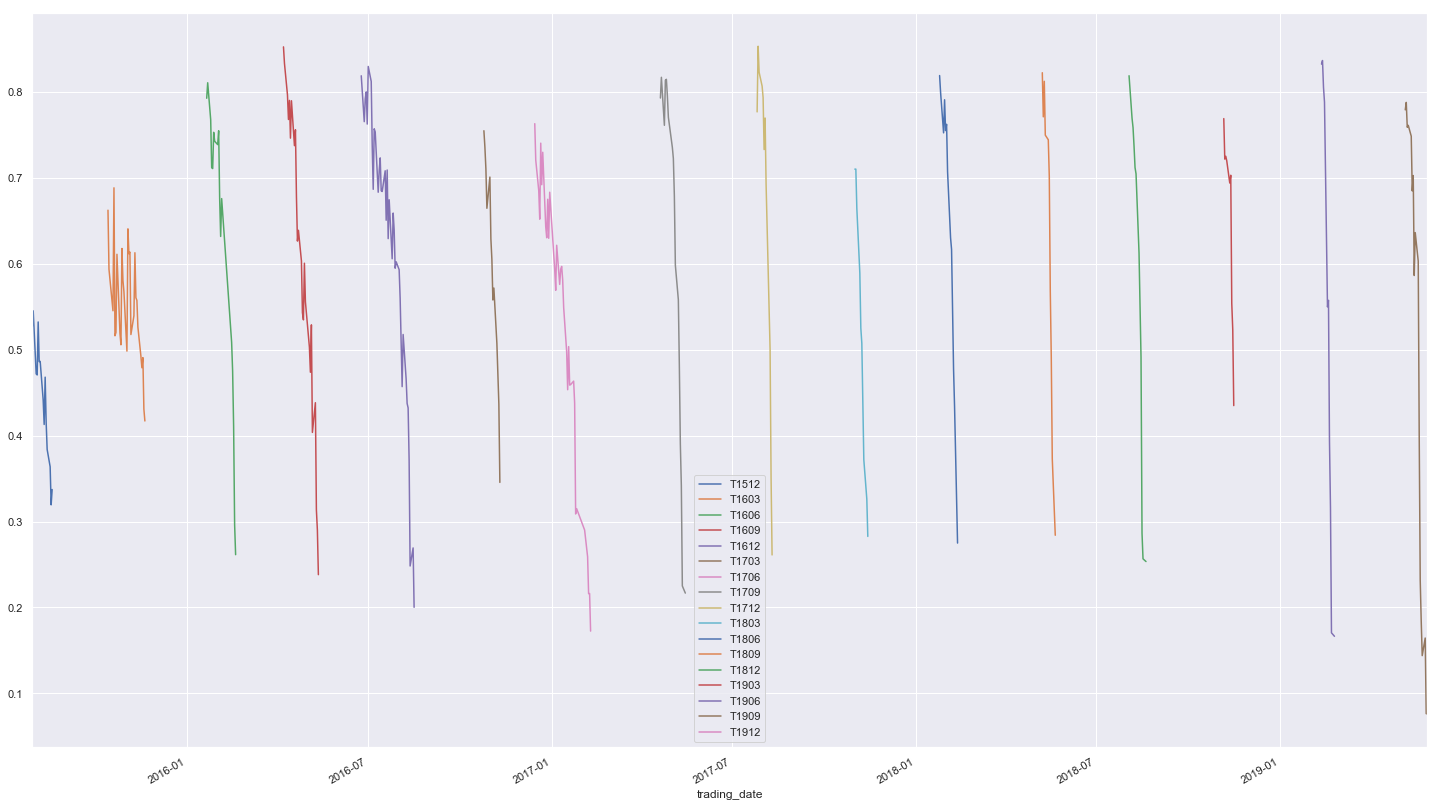

In [35]:
active_posted_size_df.plot()

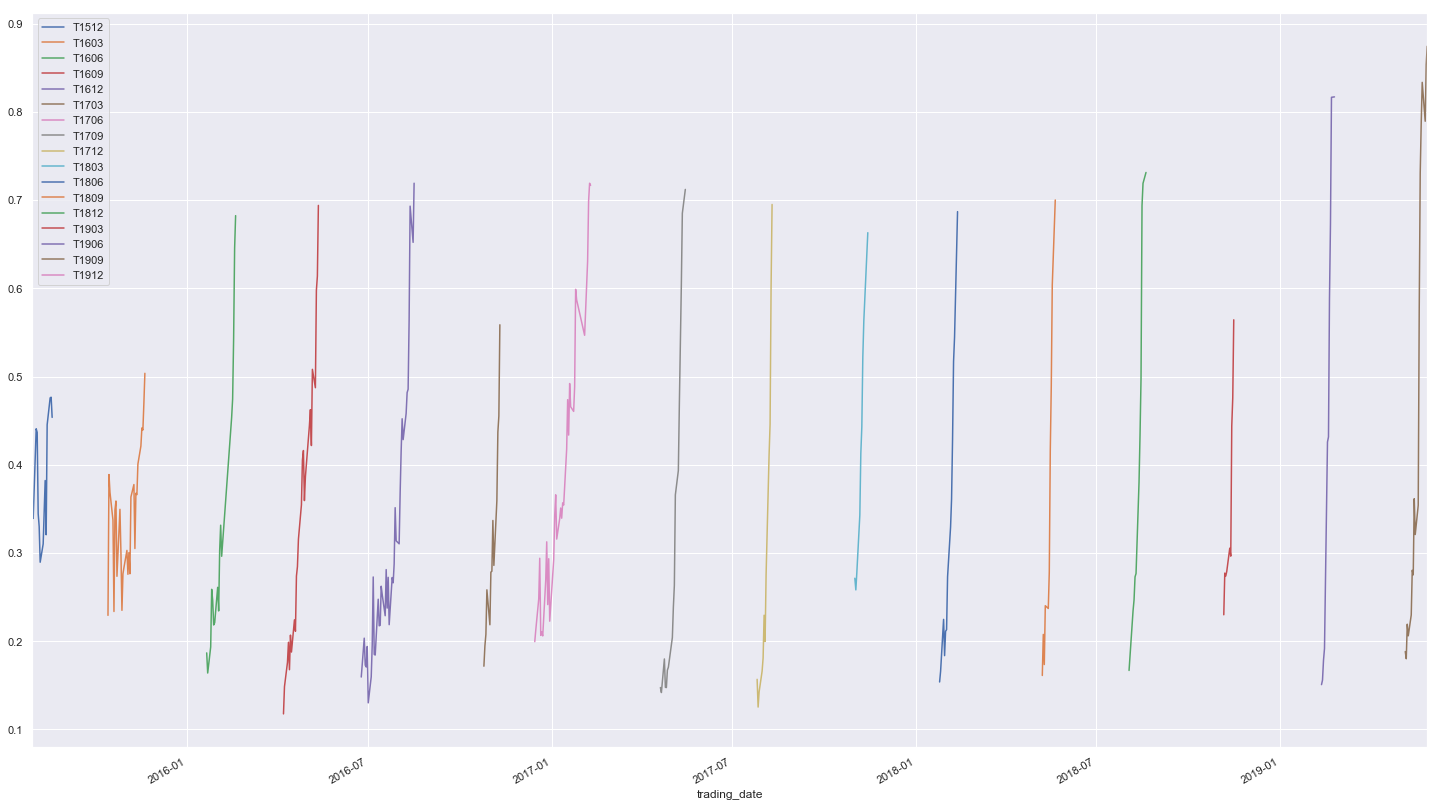

In [36]:
deferred_posted_size_df.plot()

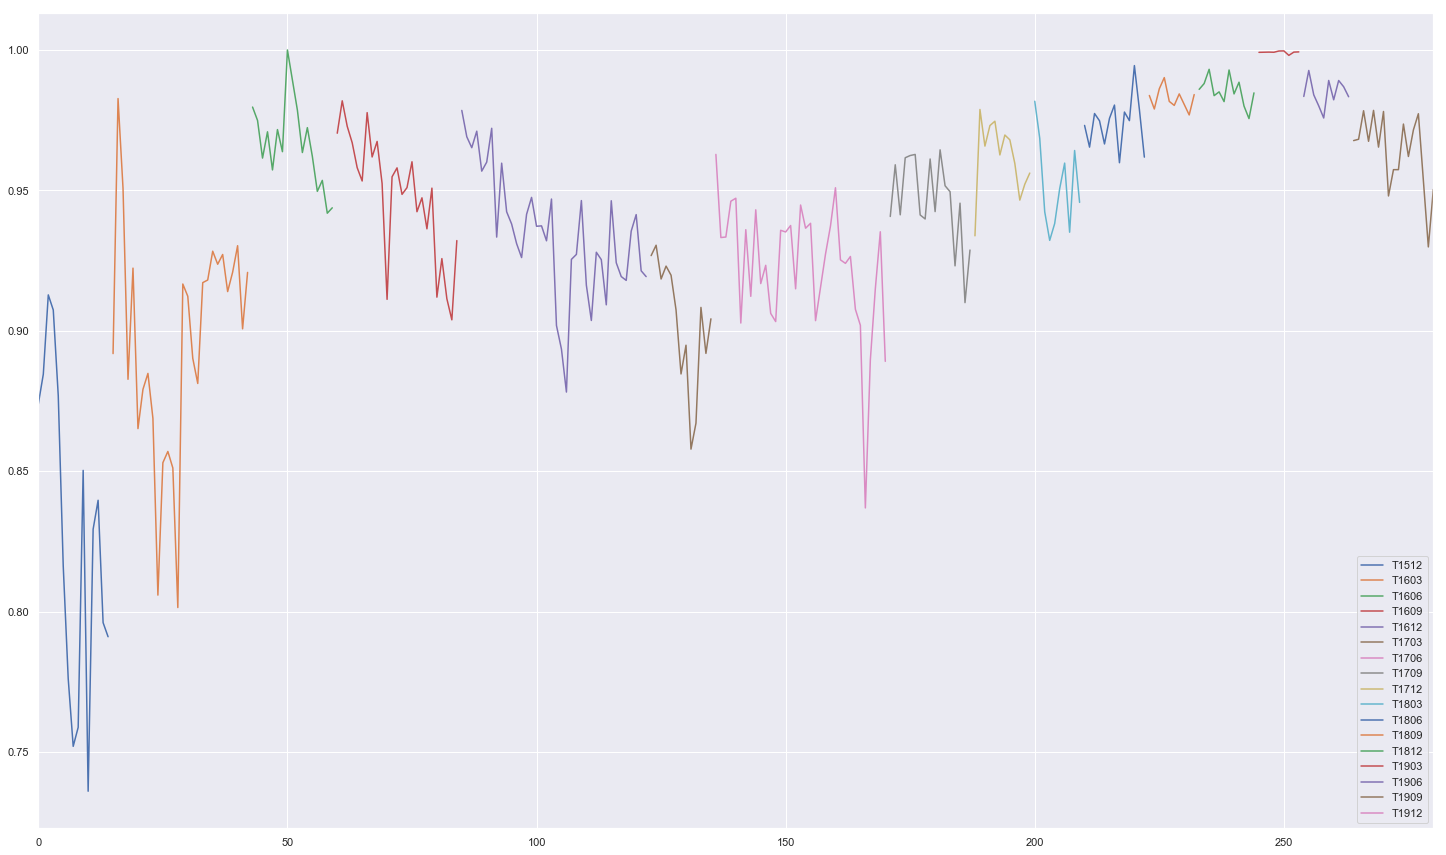

In [41]:
df_sum = (active_posted_size_df + deferred_posted_size_df)
df_sum.index = range(df_sum.shape[0])
df_sum.plot()

In [37]:
T_roll_period['active_min_posted_size'] = active_posted_size_df.min()
T_roll_period['active_mean_posted_size'] = active_posted_size_df.mean()
T_roll_period['deferred_min_posted_size'] = deferred_posted_size_df.min()
T_roll_period['deferred_mean_posted_size'] = deferred_posted_size_df.mean()

In [38]:
T_roll_period['sum_min_posted_size'] = (active_posted_size_df + deferred_posted_size_df).min()
T_roll_period['sum_mean_posted_size'] = (active_posted_size_df + deferred_posted_size_df).mean()

In [39]:
T_roll_period##posted_size fraction sum

,old_start,old_end,new_start,new_end,start,end,active_min_posted_size,active_mean_posted_size,deferred_min_posted_size,deferred_mean_posted_size,sum_min_posted_size,sum_mean_posted_size
contract,,,,,,,,,,,,
T1509,NaT,NaT,2015-03-20,2015-03-20,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
T1512,2015-07-22,2015-08-19,2015-07-30,2015-09-16,2015-07-30,2015-08-19,0.319494,0.444060,0.289554,0.382655,0.735991,0.826715
T1603,2015-10-14,2015-11-20,2015-09-07,2015-11-25,2015-10-14,2015-11-20,0.417135,0.553647,0.229351,0.342701,0.801416,0.896348
T1606,2016-01-15,2016-02-19,2016-01-21,2016-02-24,2016-01-21,2016-02-19,0.261475,0.630668,0.164009,0.336054,0.941863,0.966722
T1609,2016-04-05,2016-05-12,2016-04-07,2016-05-20,2016-04-07,2016-05-12,0.238202,0.601758,0.117677,0.346581,0.903885,0.948339
T1612,2016-06-22,2016-08-16,2016-06-24,2016-08-23,2016-06-24,2016-08-16,0.200221,0.619490,0.130203,0.315401,0.878162,0.934891
T1703,2016-10-19,2016-11-10,2016-10-25,2016-11-15,2016-10-25,2016-11-10,0.345619,0.591763,0.171723,0.310905,0.857836,0.902669
T1706,2016-12-14,2017-02-09,2016-12-15,2017-02-13,2016-12-15,2017-02-09,0.172486,0.531198,0.199544,0.391514,0.836893,0.922712
T1709,2017-04-17,2017-05-15,2017-04-20,2017-05-17,2017-04-20,2017-05-15,0.216729,0.618624,0.141873,0.327579,0.910014,0.946203


## TF

In [42]:
TF_roll_period['active_min_posted_size'] = np.nan
TF_roll_period['active_mean_posted_size'] = np.nan
TF_roll_period['deferred_min_posted_size'] = np.nan
TF_roll_period['deferred_mean_posted_size'] = np.nan
TF_roll_period['sum_min_posted_size'] = np.nan
TF_roll_period['sum_mean_posted_size'] = np.nan

active_posted_size_list = []
deferred_posted_size_list = []
for deferred_contract in TF_roll_period.index[1:]:
    
    active_contract = TF_posted_size.loc[:, :deferred_contract].columns[-2]
    
    start = TF_roll_period.loc[deferred_contract, 'start']
    end = TF_roll_period.loc[deferred_contract, 'end']
    
    active_posted_size = TF_posted_size.loc[start:end, active_contract]
    deferred_posted_size = TF_posted_size.loc[start:end, deferred_contract]
    
    active_posted_size.name = deferred_contract
    deferred_posted_size.name = deferred_contract
    
    active_posted_size_list.append(active_posted_size)
    deferred_posted_size_list.append(deferred_posted_size)
    
active_posted_size_df = pd.concat(active_posted_size_list, axis=1)
deferred_posted_size_df = pd.concat(deferred_posted_size_list, axis=1)

df_sum = (active_posted_size_df + deferred_posted_size_df)
df_sum.index = range(df_sum.shape[0])

In [43]:
TF_roll_period['active_min_posted_size'] = active_posted_size_df.min()
TF_roll_period['active_mean_posted_size'] = active_posted_size_df.mean()
TF_roll_period['deferred_min_posted_size'] = deferred_posted_size_df.min()
TF_roll_period['deferred_mean_posted_size'] = deferred_posted_size_df.mean()

TF_roll_period['sum_min_posted_size'] = (active_posted_size_df + deferred_posted_size_df).min()
TF_roll_period['sum_mean_posted_size'] = (active_posted_size_df + deferred_posted_size_df).mean()

TF_roll_period

,old_start,old_end,new_start,new_end,start,end,active_min_posted_size,active_mean_posted_size,deferred_min_posted_size,deferred_mean_posted_size,sum_min_posted_size,sum_mean_posted_size
contract,,,,,,,,,,,,
TF1312,NaT,NaT,2013-09-06,2013-09-06,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
TF1403,2013-11-07,2013-12-04,2013-11-12,2013-12-10,2013-11-12,2013-12-04,0.327968,0.494252,0.252530,0.420680,0.861736,0.914932
TF1406,2014-02-10,2014-02-25,2014-02-12,2014-02-27,2014-02-12,2014-02-25,0.388569,0.524484,0.217203,0.377219,0.823638,0.901702
TF1409,2014-05-07,2014-05-19,2014-05-08,2014-05-21,2014-05-08,2014-05-19,0.330914,0.391004,0.342675,0.444718,0.809893,0.835722
TF1412,2014-08-05,2014-08-15,2014-08-06,2014-08-18,2014-08-06,2014-08-15,0.277576,0.459009,0.343741,0.480178,0.859708,0.939187
TF1503,2014-10-27,2014-11-07,2014-10-29,2014-11-11,2014-10-29,2014-11-07,0.258865,0.381222,0.400210,0.462597,0.751194,0.843818
TF1506,2015-01-14,2015-02-09,2015-01-16,2015-02-10,2015-01-16,2015-02-09,0.340455,0.410119,0.336069,0.407156,0.708599,0.817275
TF1509,2015-04-27,2015-05-22,2015-05-05,2015-06-12,2015-05-05,2015-05-22,0.243181,0.457918,0.238177,0.378872,0.755029,0.836790
TF1512,2015-06-25,2015-08-25,2015-06-08,2015-09-10,2015-06-25,2015-08-25,0.134875,0.524911,0.211472,0.328442,0.692902,0.853353
